In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("gme.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


#### Date - The date that the stock’s behavior was observed.
#### Open - The price the stock sold for as soon as the markets opened.
#### High - The highest price the stock sold for on a particular day.
#### Low - The lowest price the stock sold for on a particular day.
#### Close - The price the stock sold for as soon as the markets closed.
#### Adj Close - The close price after all corporate actions of the day are accounted for (i.e. dividends, splitting, etc.).
#### Volume - The number of stocks traded (bought and sold) in a day.

<AxesSubplot:xlabel='Low', ylabel='Volume'>

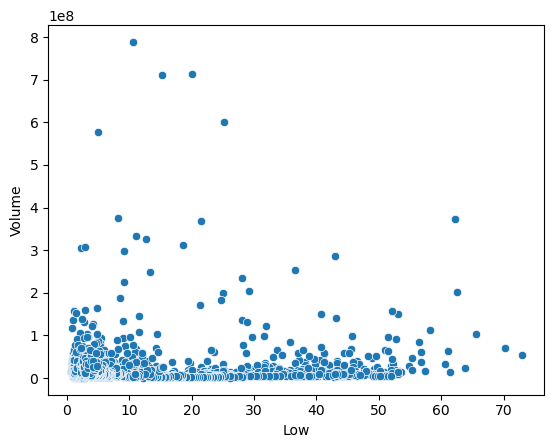

In [3]:
sns.scatterplot(data=df, x='Low', y='Volume')

<AxesSubplot:>

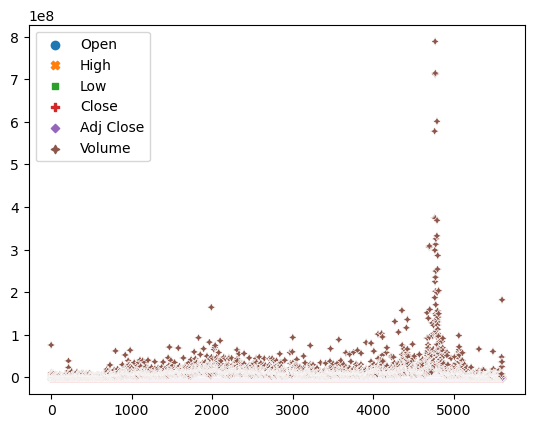

In [4]:
sns.scatterplot(data=df)

In [5]:
df[df["High"] == df["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [6]:
df.loc[0]['Date'].month

2

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


In [8]:
count = 0
total = 0
for month in range(1, 13):
    for i in range(len(df)):
        if df.loc[i]['Date'].month == month:
            avg = (df.loc[i]['High'] + df.loc[i]['Low']) / 2
            total += avg
            count += 1
total/count

9.233137054107122

<AxesSubplot:xlabel='Low', ylabel='Volume'>

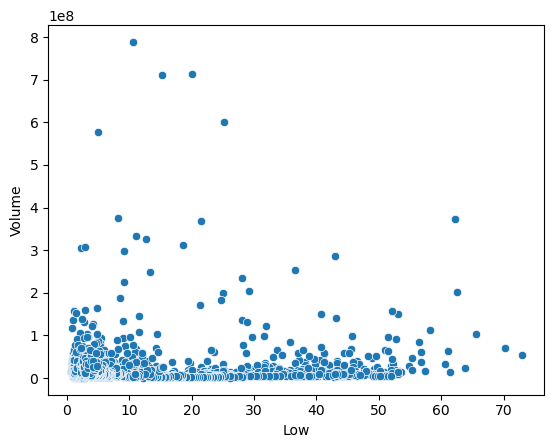

In [9]:
sns.scatterplot(data=df, x='Low', y='Volume')

In [10]:
df['Volume'].corr(df['Low'])

0.10259646883179024

# The Relationship between Low and Volume

#### The Relationship between Low and Volume has a very very weak relationship, with the correlation number being 0.10259, meaning it is positive and the strength of this graph it is very very weak. Overall, the graph has no correlation with the Low and Volume of stocks being traded.

<AxesSubplot:xlabel='Date', ylabel='High'>

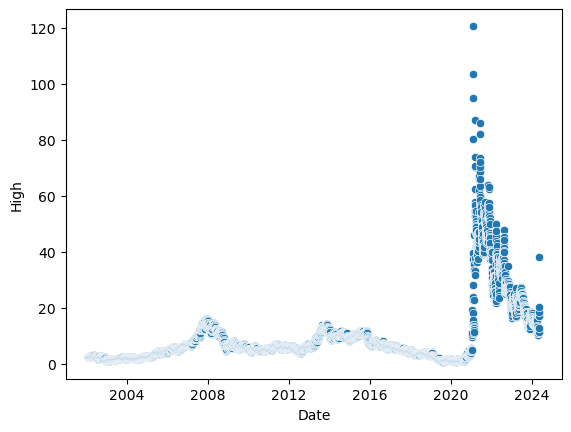

In [11]:
sns.scatterplot(data=df, x='Date', y='High')

In [12]:
df[df["High"] == df["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [13]:
df[df['Date'] == df['Date'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
5599,2024-05-13,26.34,38.200001,24.77,30.450001,30.450001,182308700


<AxesSubplot:xlabel='Date', ylabel='High'>

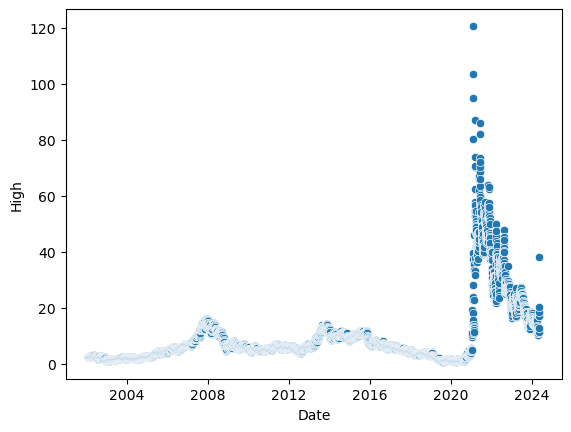

In [14]:
sns.scatterplot(data=df, x='Date', y='High')

In [15]:
log_high = np.log(df["High"])

In [16]:
df["Log High"] = log_high

In [17]:
df['numeric_time'] = pd.to_datetime(df['Date']).astype('int64') // 10**9  # Converts to seconds since epoch

# Now you can calculate the Pearson correlation between 'numeric_time' and another variable
correlation = df['numeric_time'].corr(df['Log High'])
correlation

0.45097470030936637